## Trendet e blerjeve të konsumatorëve 
Kjo analizë eksploron dhe analizon tendencat e blerjeve të klientëve duke përdorur një grup të dhënash. Analiza ofron njohuri mbi sjelljen e konsumatorëve dhe modelet e blerjeve duke përfshirë detaje të tilla si mosha, gjinia, historiku i blerjeve, mënyrat e preferuara të pagesës dhe shpeshtësia e blerjeve.

### Libraritë e përdorura

In [323]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import gzip

### Konstantet e përdorura

In [324]:
# Përcaktimi i ngjyrave për ti paraqitur në statistika.
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

# Lista e vlerave të mundshme për zhurmë në kolonën "Category"
lista_e_kategorive_zhurme = ["", "", "", "Special ", "Limited Edition ", "Exlusive "]

### Metodat ndihmëse

In [325]:
# Funksioni për të hedhur një vështrim në rreshtat e parë të dataset-it.
def printo_datasetin(text, df):
    print("\n" + text + ":")
    display(df.head())

# Funksioni për shtimin e zhurmës në kolonën "Category"
def shto_zhurme_ne_kategori(df):
    zhurma = np.random.choice(lista_e_kategorive_zhurme, size=len(df))
    df['Category'] = df['Category'] + zhurma

# Funksioni për përdorimin e boxplotit për analizën e zhurmës
def shfaq_boxplotin_per_zhurme(title, df):
    plt.figure(figsize=(10, 6))
    df.boxplot(column='Purchase Amount (USD)', by='Category', showfliers=False)
    plt.title(title)
    plt.suptitle('')
    plt.show()

# Funksioni për përdorimin e pie chart për shfaqjen e grafikave
def shfaq_pie_chart(title, df):
    plt.figure(figsize = (20, 6))
    counts = df["Category"].value_counts()
    explode = (0, 0.1, 0.1, 0.1)
    counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
    plt.xlabel(title, weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
    plt.axis('equal') 
    plt.legend(labels = counts.index, loc = "best")
    plt.show()

# Funksioni për gjetjën e gjinisë më të përdorur sipas stinës
def gjej_gjinine_me_te_perdorur_per_stine(df):
    # Grupimi sipas 'Season' dhe 'Gender', pastaj numërimi i rasteve
    season_gender_counts = df.groupby(['Season', 'Gender']).size().reset_index(name='Counts')
    # Gjetja e gjinisë më të shpeshtë për çdo stinë
    most_frequent_gender = season_gender_counts.loc[season_gender_counts.groupby('Season')['Counts'].idxmax()]
    return most_frequent_gender

 # Funksioni për fshirjen e kolonës
def fshij_kolonen(column,df):
    df.drop(column, axis=1)

### Leximi i dataset-it

In [372]:
# Leximi i dataset-it
df=pd.read_csv("../Shopping_Trends_Dataset.csv")

### Kualiteti i të dhënave 

- Struktura e bazës së të dhënave

In [327]:
# Shfaqja e dataseti-it
printo_datasetin("Dataset-i", df)


Dataset-i:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55.0,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19.0,Female,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50.0,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21.0,Female,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45.0,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


- Njohuri mbi llojet e të dhënave

In [328]:
# Për të fituar njohuri mbi llojet e të dhënave ekzekutojmë këtë komandë:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3951 entries, 0 to 3950
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3951 non-null   int64  
 1   Age                     3948 non-null   float64
 2   Gender                  3950 non-null   object 
 3   Item Purchased          3951 non-null   object 
 4   Category                3950 non-null   object 
 5   Purchase Amount (USD)   3951 non-null   int64  
 6   Location                3951 non-null   object 
 7   Size                    3951 non-null   object 
 8   Color                   3951 non-null   object 
 9   Season                  3951 non-null   object 
 10  Review Rating           3951 non-null   float64
 11  Subscription Status     3951 non-null   object 
 12  Shipping Type           3951 non-null   object 
 13  Discount Applied        3951 non-null   object 
 14  Promo Code Used         3951 non-null   

- Kontrollimi i vlerave null

In [373]:
# Komanda për kontrollimin e vlerave null:
df.isnull().sum()

Customer ID               0
Age                       3
Gender                    1
Item Purchased            0
Category                  1
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [374]:
# ----------- Zevëndësimi i vlerave null -----------

# Kalkulimi i moshës mesatare, duke mos i përfshirë vlerat NaN
average_age = df['Age'].mean()

# Zevëndësimi i vlerave NaN i kolonës Age me moshën mesatare
df['Age'].fillna(average_age, inplace=True)

# Shfaqja e dataseti-it të modifikuar
print(df.isnull().sum())

Customer ID               0
Age                       0
Gender                    1
Item Purchased            0
Category                  1
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [375]:
# Fshirja e rreshtave me vlera null në kolonat me vlera null
df = df.dropna(subset=['Customer ID', 'Gender', 'Item Purchased', 'Category', 
                    'Purchase Amount (USD)', 'Location', 'Size', 'Color', 
                    'Season', 'Review Rating', 'Subscription Status', 
                    'Shipping Type', 'Discount Applied', 'Promo Code Used', 
                    'Previous Purchases', 'Payment Method', 'Frequency of Purchases'])

# Shfaqja e dataseti-it të modifikuar
print(df.isnull().sum())


Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


- Kërkimi i duplikatëve

In [331]:
# Komanda për kërkimin e duplikateve dhe shfaqja e rezultatit
print("Duplikatet: " + str(df.duplicated().sum()))

Duplikatet: 40


In [332]:
# ----------- Fshirja e duplikateve -----------
df.drop_duplicates(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 
                    'Purchase Amount (USD)', 'Location', 'Size', 'Color', 
                    'Season', 'Review Rating', 'Subscription Status', 
                    'Shipping Type', 'Discount Applied', 'Promo Code Used', 
                    'Previous Purchases', 'Payment Method', 'Frequency of Purchases'], 
                   keep='first', inplace=True)

# Kërkimi përsëri i duplikateve dhe shfaqja e rezultatit
print("Duplikatet: " + str(df.duplicated().sum()))

Duplikatet: 0


- Fshirja e kolonave

In [333]:
# Fshirja e kolonës 'Previous Purchases'
df = df.drop('Previous Purchases', axis=1)

# Shfaqja e disa rreshtave të datasetit pas heqjes së kolonës 'Previous Purchases'
printo_datasetin("Dataset-i", df)


Dataset-i:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
0,1,55.0,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,Venmo,Fortnightly
1,2,19.0,Female,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,Cash,Fortnightly
2,3,50.0,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,Credit Card,Weekly
3,4,21.0,Female,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,PayPal,Weekly
4,5,45.0,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,PayPal,Annually


In [334]:
# Fshirja e kolonës 'Frequency of Purchases'
df = df.drop('Frequency of Purchases', axis=1)

# Shfaqja e disa rreshtave të datasetit pas heqjes së kolonës 'Frequency of Purchases'
printo_datasetin("Dataset-i", df)


Dataset-i:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method
0,1,55.0,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,Venmo
1,2,19.0,Female,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,Cash
2,3,50.0,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,Credit Card
3,4,21.0,Female,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,PayPal
4,5,45.0,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,PayPal


- Outliers

<Axes: xlabel='Age'>

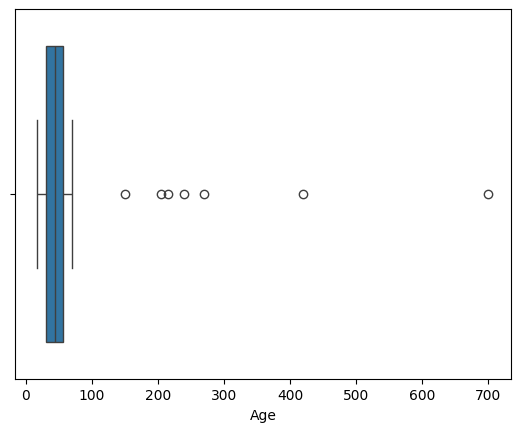

In [335]:
# -----------  Kërkimi i Outliers -----------

# Përdorimi i paketës seaborn për të paraqitur Outliers
sns.boxplot(df['Age'], orient='h')

In [336]:
# -----------  Largimi i Outliers me metodën Z-Score -----------

# Gjetja e limiteve
upper_limit = df['Age'].mean() + 3*df['Age'].std()
lower_limit = df['Age'].mean() - 3*df['Age'].std()
print('Limiti i sipërm:', upper_limit)
print('Limiti i poshtëm:', lower_limit)

Limiti i sipërm: 105.77592085161783
Limiti i poshtëm: -16.663907661480735


In [337]:
# -----------  Gjetja e Outliers -----------

df.loc[(df['Age'] > upper_limit) | (df['Age'] < lower_limit)]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method
3944,3900,150.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,Venmo
3945,3900,240.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,Venmo
3946,3900,420.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,Venmo
3947,3900,215.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,Venmo
3948,3900,205.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,Venmo
3949,3900,270.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,Venmo
3950,3900,700.0,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,Venmo


In [338]:
# -----------  Largimi i të dhënave që janë paraqitur si Outliers -----------

new_df = df.loc[(df['Age'] <= upper_limit) & (df['Age'] >= lower_limit)]
print('Para largimit të Outliers:', len(df))
print('Pas largimit të Outliers:',len(new_df))
print('Outliers:', len(df)-len(new_df))

Para largimit të Outliers: 3911
Pas largimit të Outliers: 3904
Outliers: 7


<Axes: xlabel='Age'>

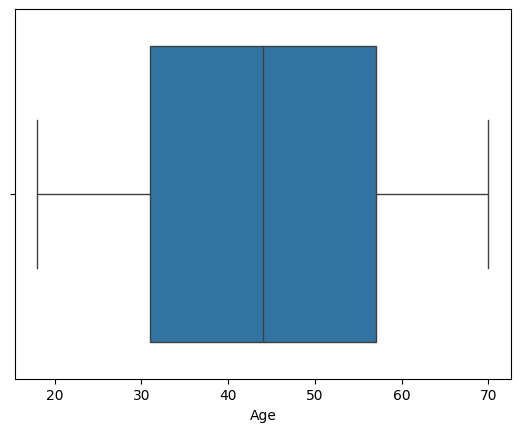

In [339]:
# -----------  Paraqitja e dataset-it pa Outliers -----------

sns.boxplot(new_df['Age'], orient='h')

- Noisy data

In [340]:
# -----------  Shtimi i zhurmës -----------

np.random.seed(42)

# Shtimi i zhurmës në një kolonë numerike
kolona_zhurme = 'Purchase Amount (USD)'
df[kolona_zhurme] = df[kolona_zhurme] + np.random.normal(0, 20, size=len(df))

In [341]:
# Shfaqja e disa rreshtave të parë të datasetit me zhurmë
printo_datasetin("Dataset-i me zhurmë", df)


Dataset-i me zhurmë:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method
0,1,55.0,Male,Blouse,Clothing,62.934283,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,Venmo
1,2,19.0,Female,Sweater,Clothing,61.234714,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,Cash
2,3,50.0,Male,Jeans,Clothing,85.953771,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,Credit Card
3,4,21.0,Female,Sandals,Footwear,120.460597,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,PayPal
4,5,45.0,Male,Blouse,Clothing,44.316933,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,PayPal


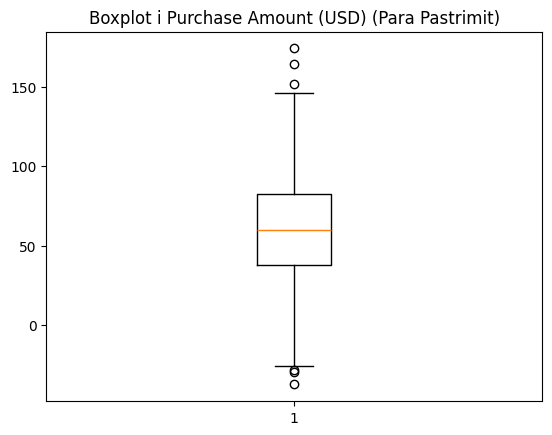

In [342]:
# -----------  Vizualizimi i dataset-it me zhurmë (Para Pastrimit) -----------

plt.boxplot(df[kolona_zhurme])
plt.title(f'Boxplot i {kolona_zhurme} (Para Pastrimit)')
plt.show()

In [343]:
# ----------- Trajtimi i  zhurmës bazuar në metodën IQR -----------

# Heqja e outliers bazuar në shtrirjen e kuadrit (IQR)
Q1 = df[kolona_zhurme].quantile(0.25)
Q3 = df[kolona_zhurme].quantile(0.75)
IQR = Q3 - Q1
limiti_i_ulët = Q1 - 1.5 * IQR
limiti_i_lartë = Q3 + 1.5 * IQR

In [344]:
# Pastrimi i dataset-it
df_pastruar = df[(df[kolona_zhurme] >= limiti_i_ulët) & (df[kolona_zhurme] <= limiti_i_lartë)]

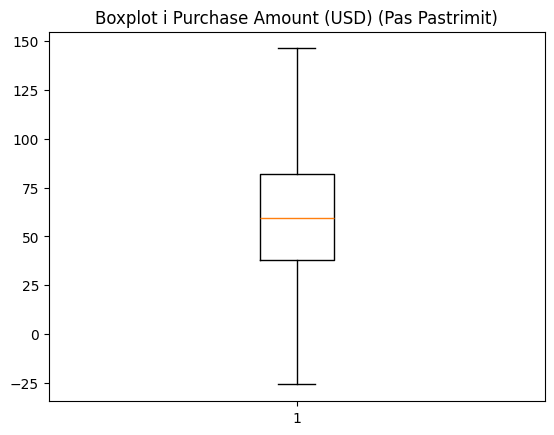

In [345]:
# ----------- Vizualizimi i datasetit të pastruar më zhurmë -----------

plt.boxplot(df_pastruar[kolona_zhurme])
plt.title(f'Boxplot i {kolona_zhurme} (Pas Pastrimit)')
plt.show()

In [346]:
# ----------- Shto zhurmë në kolonën "Category" -----------
shto_zhurme_ne_kategori(df)

In [347]:
# Shfaq datasetin me zhurmë
printo_datasetin("Dataset-i me zhurmë", df)


Dataset-i me zhurmë:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method
0,1,55.0,Male,Blouse,Clothing,62.934283,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,Venmo
1,2,19.0,Female,Sweater,Clothing,61.234714,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,Cash
2,3,50.0,Male,Jeans,Clothing,85.953771,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,Credit Card
3,4,21.0,Female,Sandals,FootwearLimited Edition,120.460597,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,PayPal
4,5,45.0,Male,Blouse,ClothingSpecial,44.316933,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,PayPal


<Figure size 1000x600 with 0 Axes>

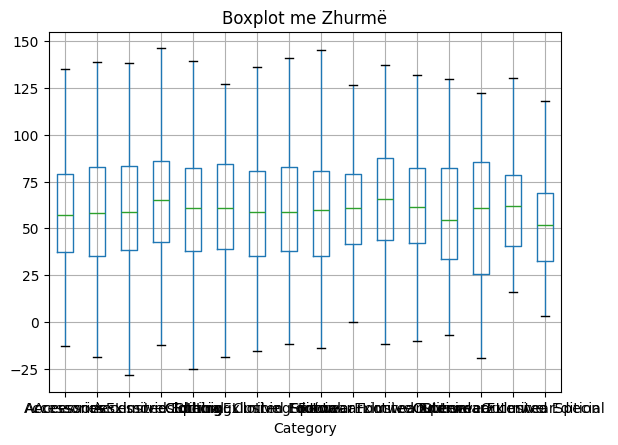

In [348]:
# Shfaq boxplotin me zhurmë
shfaq_boxplotin_per_zhurme('Boxplot me Zhurmë', df)

In [349]:
# Hiqe të dhënat me zhurmë
df['Category'] = df['Category'].str.replace('|'.join(lista_e_kategorive_zhurme), '', regex=True)
# Hiq rreshtat ku 'Category' është e zbrazët
df = df[df['Category'] != '']  

In [350]:
# Shfaq datasetin pa zhurmë
printo_datasetin("Dataset-i pa zhurmë", df)


Dataset-i pa zhurmë:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method
0,1,55.0,Male,Blouse,Clothing,62.934283,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,Venmo
1,2,19.0,Female,Sweater,Clothing,61.234714,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,Cash
2,3,50.0,Male,Jeans,Clothing,85.953771,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,Credit Card
3,4,21.0,Female,Sandals,Footwear,120.460597,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,PayPal
4,5,45.0,Male,Blouse,Clothing,44.316933,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,PayPal


<Figure size 1000x600 with 0 Axes>

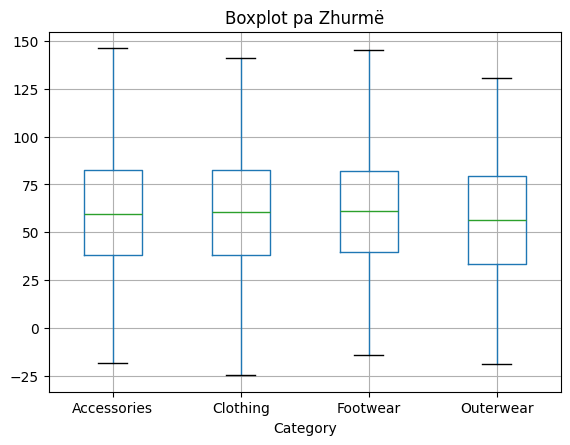

In [351]:
# Shfaq boxplotin pa zhurmë
shfaq_boxplotin_per_zhurme('Boxplot pa Zhurmë', df)

### Preprocesimi i të dhënave

- Reduktimi i dimensionalitetit

In [356]:
# Pasi qe kolonat: Discount Applied (Yes/No) dhe Promo Code Used (Yes/No) paraqesin aplikim të zbritjeve të produktit, 
# informacionin e të dy kolonave mund ta paraqesim në kolonën Sale Applied.

df['Sale Applied'] = df.apply(lambda row: 'Yes' if row['Discount Applied'] == 'Yes' or row['Promo Code Used'] == 'Yes' else 'No', axis=1)
df = df.drop('Discount Applied', axis=1)
df = df.drop('Promo Code Used', axis=1)
# Shfaqja e disa rreshtave të datasetit pas heqjes së kolonës 'Previous Purchases'
printo_datasetin("Dataset-i", df)


Dataset-i:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Payment Method,Sale Applied
0,1,55.0,Male,Blouse,Clothing,62.934283,Kentucky,L,Gray,Winter,3.1,Yes,Express,Venmo,Yes
1,2,19.0,Female,Sweater,Clothing,61.234714,Maine,L,Maroon,Winter,3.1,Yes,Express,Cash,Yes
2,3,50.0,Male,Jeans,Clothing,85.953771,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Credit Card,Yes
3,4,21.0,Female,Sandals,Footwear,120.460597,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,PayPal,Yes
4,5,45.0,Male,Blouse,Clothing,44.316933,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,PayPal,Yes


- Mostrimi i të dhënave

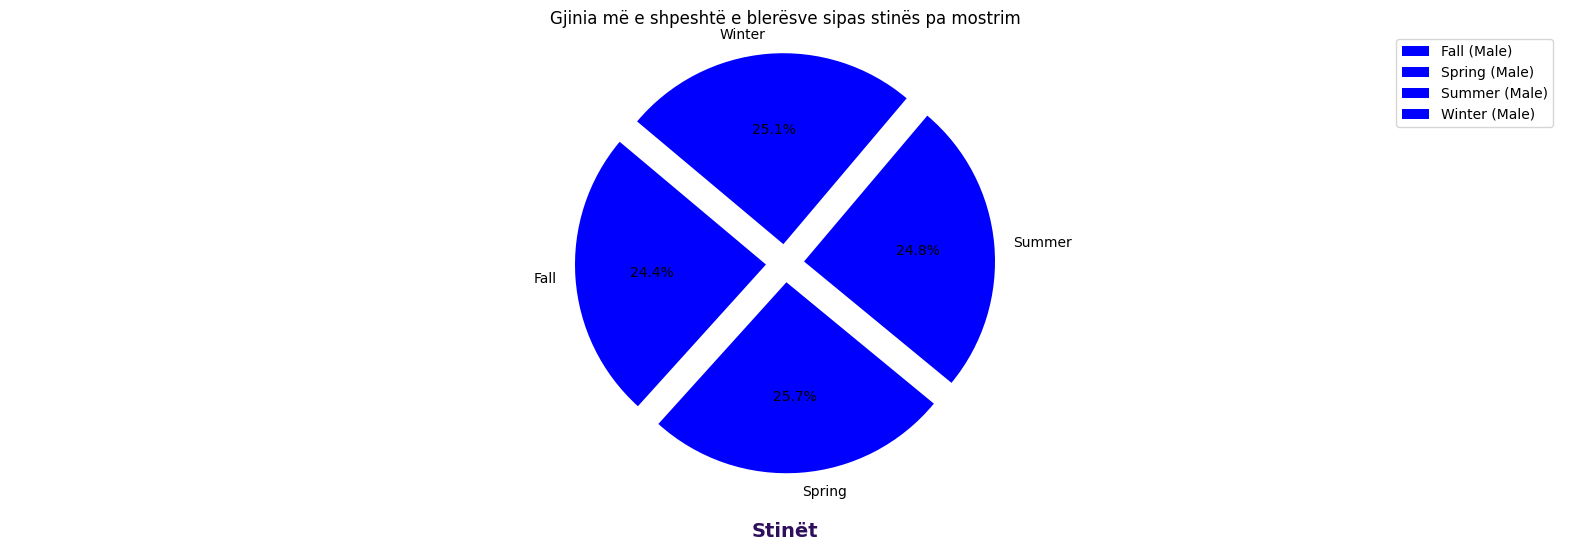

In [357]:
# ----------- Paraqitja e ngjyrave më të përdorura gjatë stinëve -----------

# Gjetja e gjinisë më të shpeshtë për çdo stinë me të dhënat e mostrës
most_frequent_gender = gjej_gjinine_me_te_perdorur_per_stine(df)

# Numri total i rasteve për gjininë më të shpeshtë në të gjitha stinët
total_counts = most_frequent_gender['Counts'].sum()

# Llogaritja e madhësive për grafikonin e pie
sizes = most_frequent_gender['Counts'] / total_counts * 100

# Përdorimi i një palete të paracaktuar të ngjyrave për gjinitë
gender_colors = {'Male': 'blue', 'Female': 'pink'}

# Aplikimi i ngjyrave bazuar në gjininë më të shpeshtë
pie_colors = most_frequent_gender['Gender'].map(gender_colors)

# Vizatimi i grafikonit të pie
plt.figure(figsize=(20, 6))
labels = most_frequent_gender['Season']
explode = [0.1] * len(labels)

plt.pie(sizes, labels=labels, colors=pie_colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Gjinia më e shpeshtë e blerësve sipas stinës pa mostrim')
plt.xlabel('Stinët', weight="bold", color="#2F0F5D", fontsize=14, labelpad=20)
plt.axis('equal')
plt.legend(labels=[f'{stina} ({gjinia})' for stina, gjinia in zip(labels, most_frequent_gender['Gender'])], loc="best")
plt.show()

In [358]:
# Marrja e rreshtave të datasetit për mostrim
sample_df = df.sample(n=500)

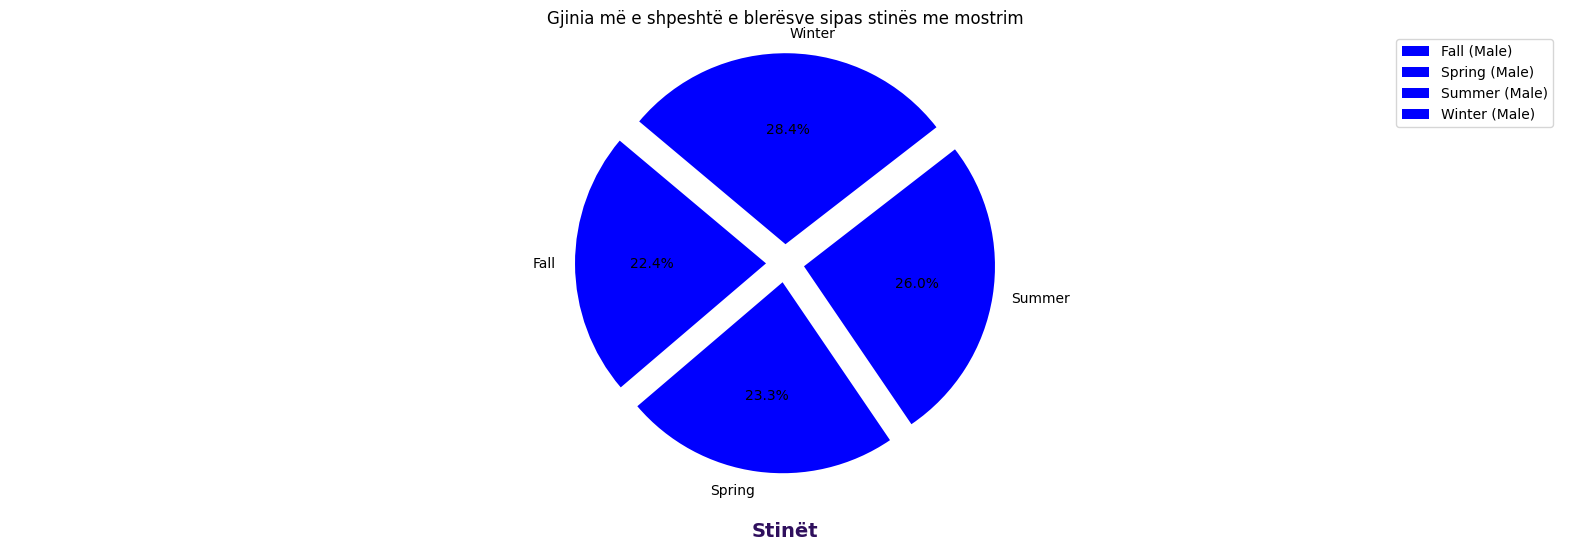

In [359]:
# ----------- Paraqitja e ngjyrave më të përdorura gjatë stinëve me mostrim -----------

# Gjetja e gjinisë më të shpeshtë për çdo stinë me të dhënat e mostrës
most_frequent_gender = gjej_gjinine_me_te_perdorur_per_stine(sample_df)

# Numri total i rasteve për gjininë më të shpeshtë në të gjitha stinët
total_counts = most_frequent_gender['Counts'].sum()

# Llogaritja e madhësive për grafikonin e pie
sizes = most_frequent_gender['Counts'] / total_counts * 100

# Përdorimi i një palete të paracaktuar të ngjyrave për gjinitë
gender_colors = {'Male': 'blue', 'Female': 'pink'}

# Aplikimi i ngjyrave bazuar në gjininë më të shpeshtë
pie_colors = most_frequent_gender['Gender'].map(gender_colors)

# Vizatimi i grafikonit të pie
plt.figure(figsize=(20, 6))
labels = most_frequent_gender['Season']
explode = [0.1] * len(labels) 

plt.pie(sizes, labels=labels, colors=pie_colors, explode=explode, autopct='%1.1f%%', startangle=140)
plt.title('Gjinia më e shpeshtë e blerësve sipas stinës me mostrim')
plt.xlabel('Stinët', weight="bold", color="#2F0F5D", fontsize=14, labelpad=20)
plt.axis('equal')
plt.legend(labels=[f'{stina} ({gjinia})' for stina, gjinia in zip(labels, most_frequent_gender['Gender'])], loc="best")
plt.show()

- Agregimi i të dhënave

In [360]:
# ----------- Shembull i agregimit -----------

# Agregimi i moshës mesatare dhe shumës së blerjes sipas gjinisë
avg_age_purchase_by_gender = sample_df.groupby('Gender').agg({
    'Age': 'mean',
    'Purchase Amount (USD)': 'mean'
})

# Shfaq rezultatin
print(avg_age_purchase_by_gender)

              Age  Purchase Amount (USD)
Gender                                  
Female  48.739645              57.252965
Male    43.811220              60.231270


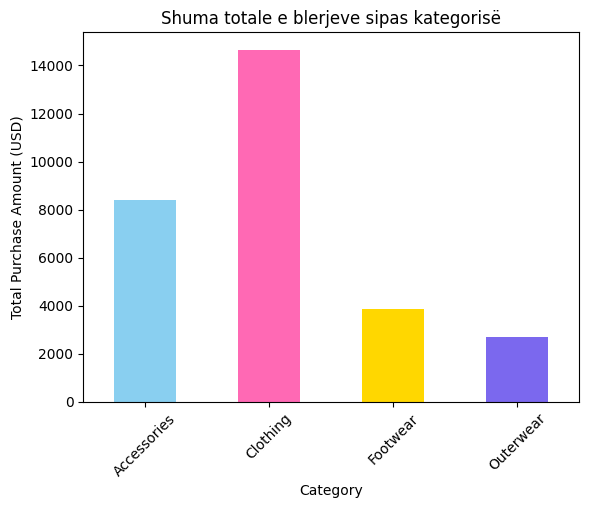

In [361]:
# ----------- Shembull i agregimit -----------

# Agregimi i të dhënave për shumën totale të blerjeve sipas kategorisë
total_purchase_by_category = sample_df.groupby('Category')['Purchase Amount (USD)'].sum()

# Vizualizimi i të dhënave
total_purchase_by_category.plot(kind='bar', color=colors)
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.title('Shuma totale e blerjeve sipas kategorisë')
plt.xticks(rotation=45)
plt.show()

- Kompresimi 

In [362]:
# Ruajtja e Datasetit në një skedar CSV të kompresuar
compressed_file_path = 'compressed_data.csv.gz'
with gzip.open(compressed_file_path, 'wt', encoding='utf-8') as f:
    df.to_csv(f, index=False)

print(f"Te dhenat jane te kompresuara dhe ruajtura ne {compressed_file_path}")

Te dhenat jane te kompresuara dhe ruajtura ne compressed_data.csv.gz


In [363]:
# Ngarko të dhënat e kompresuara në një dateset
with gzip.open('compressed_data.csv.gz', 'rt', encoding='utf-8') as f:
    df = pd.read_csv(f)

# Shfaqja dataset-it
printo_datasetin("Dataset-i i kompresuar", df)


Dataset-i i kompresuar:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Payment Method,Sale Applied
0,1,55.0,Male,Blouse,Clothing,62.934283,Kentucky,L,Gray,Winter,3.1,Yes,Express,Venmo,Yes
1,2,19.0,Female,Sweater,Clothing,61.234714,Maine,L,Maroon,Winter,3.1,Yes,Express,Cash,Yes
2,3,50.0,Male,Jeans,Clothing,85.953771,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Credit Card,Yes
3,4,21.0,Female,Sandals,Footwear,120.460597,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,PayPal,Yes
4,5,45.0,Male,Blouse,Clothing,44.316933,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,PayPal,Yes


- Diskretizimi 

In [364]:
# Metoda e Binning për Lehtësimin e të Dhënave
# 'Age' është kolona që duam të ndajme në bins (blloqe)
# Përcaktimi i kufijëve të bins (blloqeve)
age_bin_edges = [0, 1, 4, 12, 19, 39, 59, 100]

# Krijimi i një kolonë të re me etiketa të bins (blloqeve)
age_categories = ['Infant', 'Toddler', 'Child', 'Teen', 'Adult', 'Middle Age Adult', 'Senior Adult']
new_df['Age Category'] = pd.cut(new_df['Age'], bins=age_bin_edges, labels=age_categories)

# Shfaqja DataFrame
print(new_df[['Age', 'Age Category']])

            Age      Age Category
0     55.000000  Middle Age Adult
1     19.000000              Teen
2     50.000000  Middle Age Adult
3     21.000000             Adult
4     45.000000  Middle Age Adult
...         ...               ...
3939  52.000000  Middle Age Adult
3940  46.000000  Middle Age Adult
3941  44.000000  Middle Age Adult
3942  52.000000  Middle Age Adult
3943  44.513931  Middle Age Adult

[3904 rows x 2 columns]


- Zgjedhja e nën bashkësisë së vetive

In [365]:
# Zgjidhja e vetive  vetëm për blerjet e kategorisë "Clothing".
subset_clothing = df[df['Category'] == 'Clothing']

# Shfaqja e disa rreshtave të nën bashkësisë së zgjedhur
subset_clothing.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Payment Method,Sale Applied
0,1,55.0,Male,Blouse,Clothing,62.934283,Kentucky,L,Gray,Winter,3.1,Yes,Express,Venmo,Yes
1,2,19.0,Female,Sweater,Clothing,61.234714,Maine,L,Maroon,Winter,3.1,Yes,Express,Cash,Yes
2,3,50.0,Male,Jeans,Clothing,85.953771,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Credit Card,Yes
4,5,45.0,Male,Blouse,Clothing,44.316933,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,PayPal,Yes
6,7,63.0,Male,Shirt,Clothing,116.584256,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Cash,Yes


- Krijimi i vetive

In [366]:
# Krijimi i nje vetije te re që përmban vetëm blerjet me shumë me të lartë se 50 USD.
vetija_e_re = df[df['Purchase Amount (USD)'] > 50]

# Shfaqja e disa rreshtave të vetisë së re
vetija_e_re.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Payment Method,Sale Applied
0,1,55.0,Male,Blouse,Clothing,62.934283,Kentucky,L,Gray,Winter,3.1,Yes,Express,Venmo,Yes
1,2,19.0,Female,Sweater,Clothing,61.234714,Maine,L,Maroon,Winter,3.1,Yes,Express,Cash,Yes
2,3,50.0,Male,Jeans,Clothing,85.953771,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Credit Card,Yes
3,4,21.0,Female,Sandals,Footwear,120.460597,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,PayPal,Yes
6,7,63.0,Male,Shirt,Clothing,116.584256,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Cash,Yes
